<a href="https://colab.research.google.com/github/vivekvj18/ML-PROJECT-2/blob/main/ML_2_Smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Inspect Data ---
# Load the dataset (ensure train_dataset.csv is uploaded to Colab files)
try:
    df = pd.read_csv('train_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'train_dataset.csv' not found. Please upload the file.")

# Basic Info
print("\n--- Data Info ---")
df.info()

print("\n--- Summary Statistics ---")
display(df.describe())

# Check for duplicates and missing values
print(f"\nDuplicate Rows: {df.duplicated().sum()}")
print(f"Missing Values:\n{df.isnull().sum().sum()}")

Dataset loaded successfully.

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  i

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000



Duplicate Rows: 5517
Missing Values:
0


**EDA**


--- Distributions of Numerical Variables ---


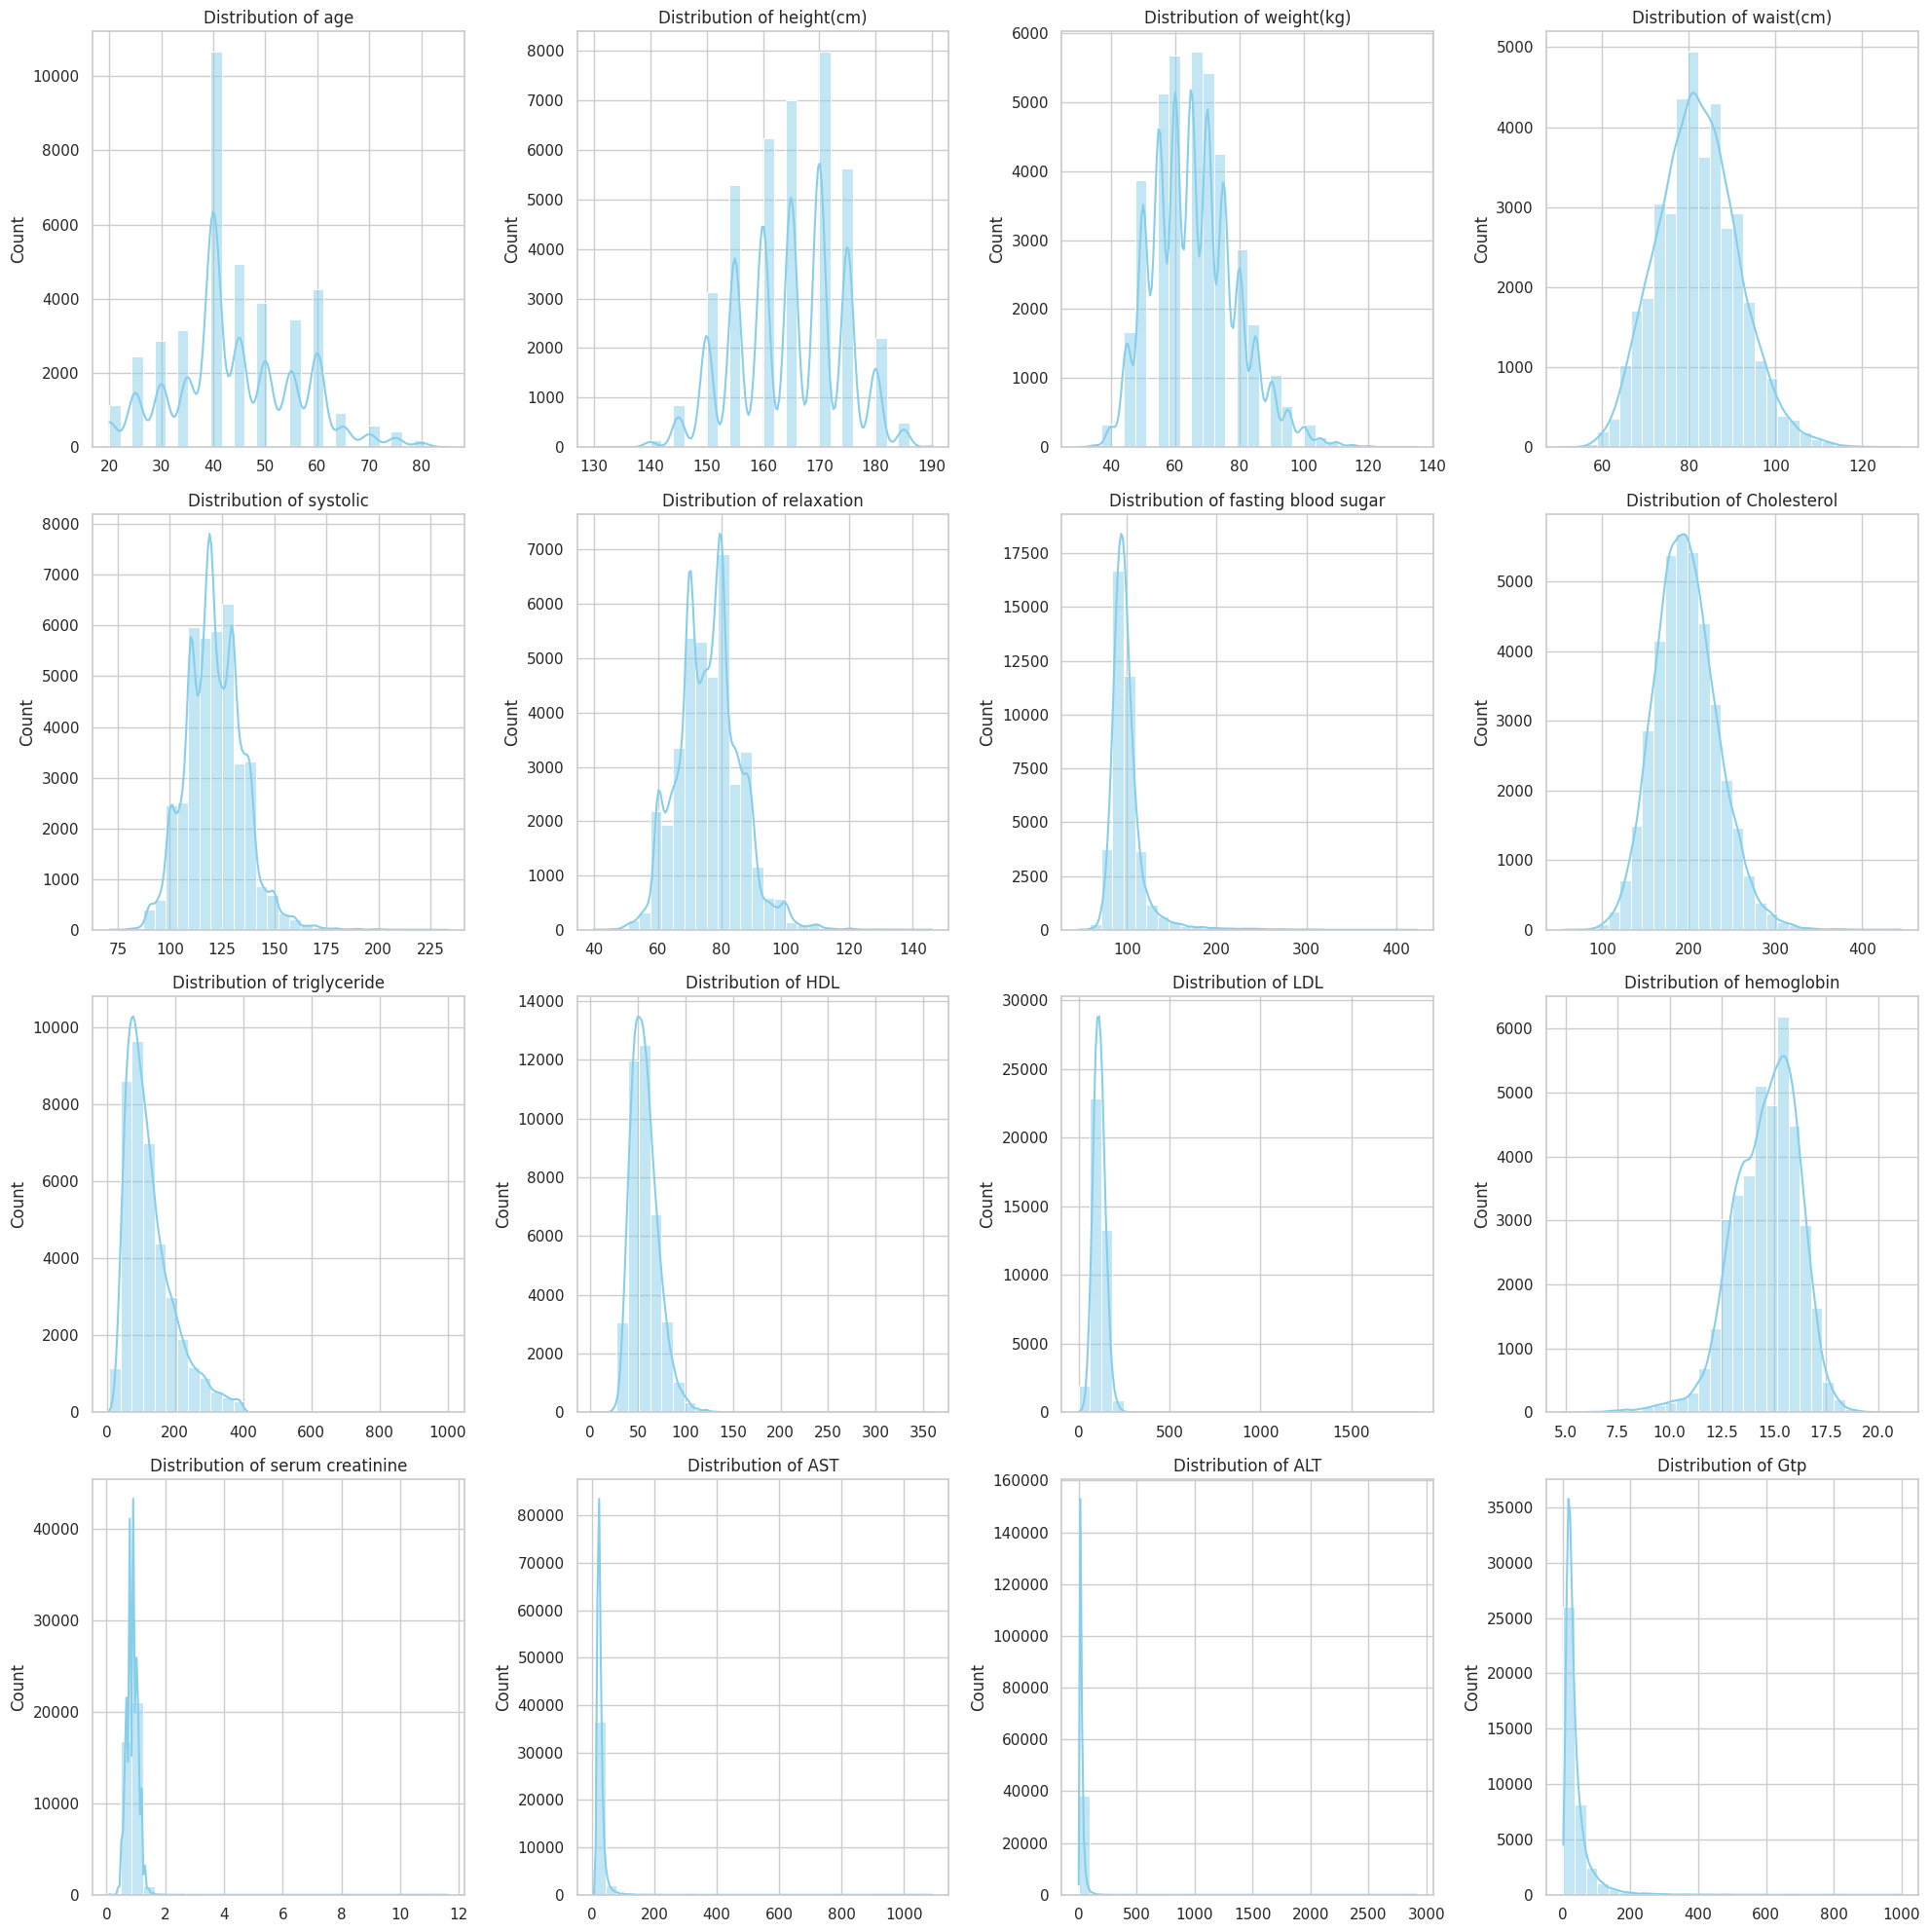

In [ ]:
# --- 2. Univariate Analysis (Distributions & Outliers) ---
# Set plot style
sns.set(style="whitegrid")

# List of continuous variables
continuous_cols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic',
                   'relaxation', 'fasting blood sugar', 'Cholesterol',
                   'triglyceride', 'HDL', 'LDL', 'hemoglobin',
                   'serum creatinine', 'AST', 'ALT', 'Gtp']

# Plot Histograms
print("\n--- Distributions of Numerical Variables ---")
plt.figure(figsize=(20, 20))
for i, col in enumerate(continuous_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


--- Boxplots for Outlier Detection ---


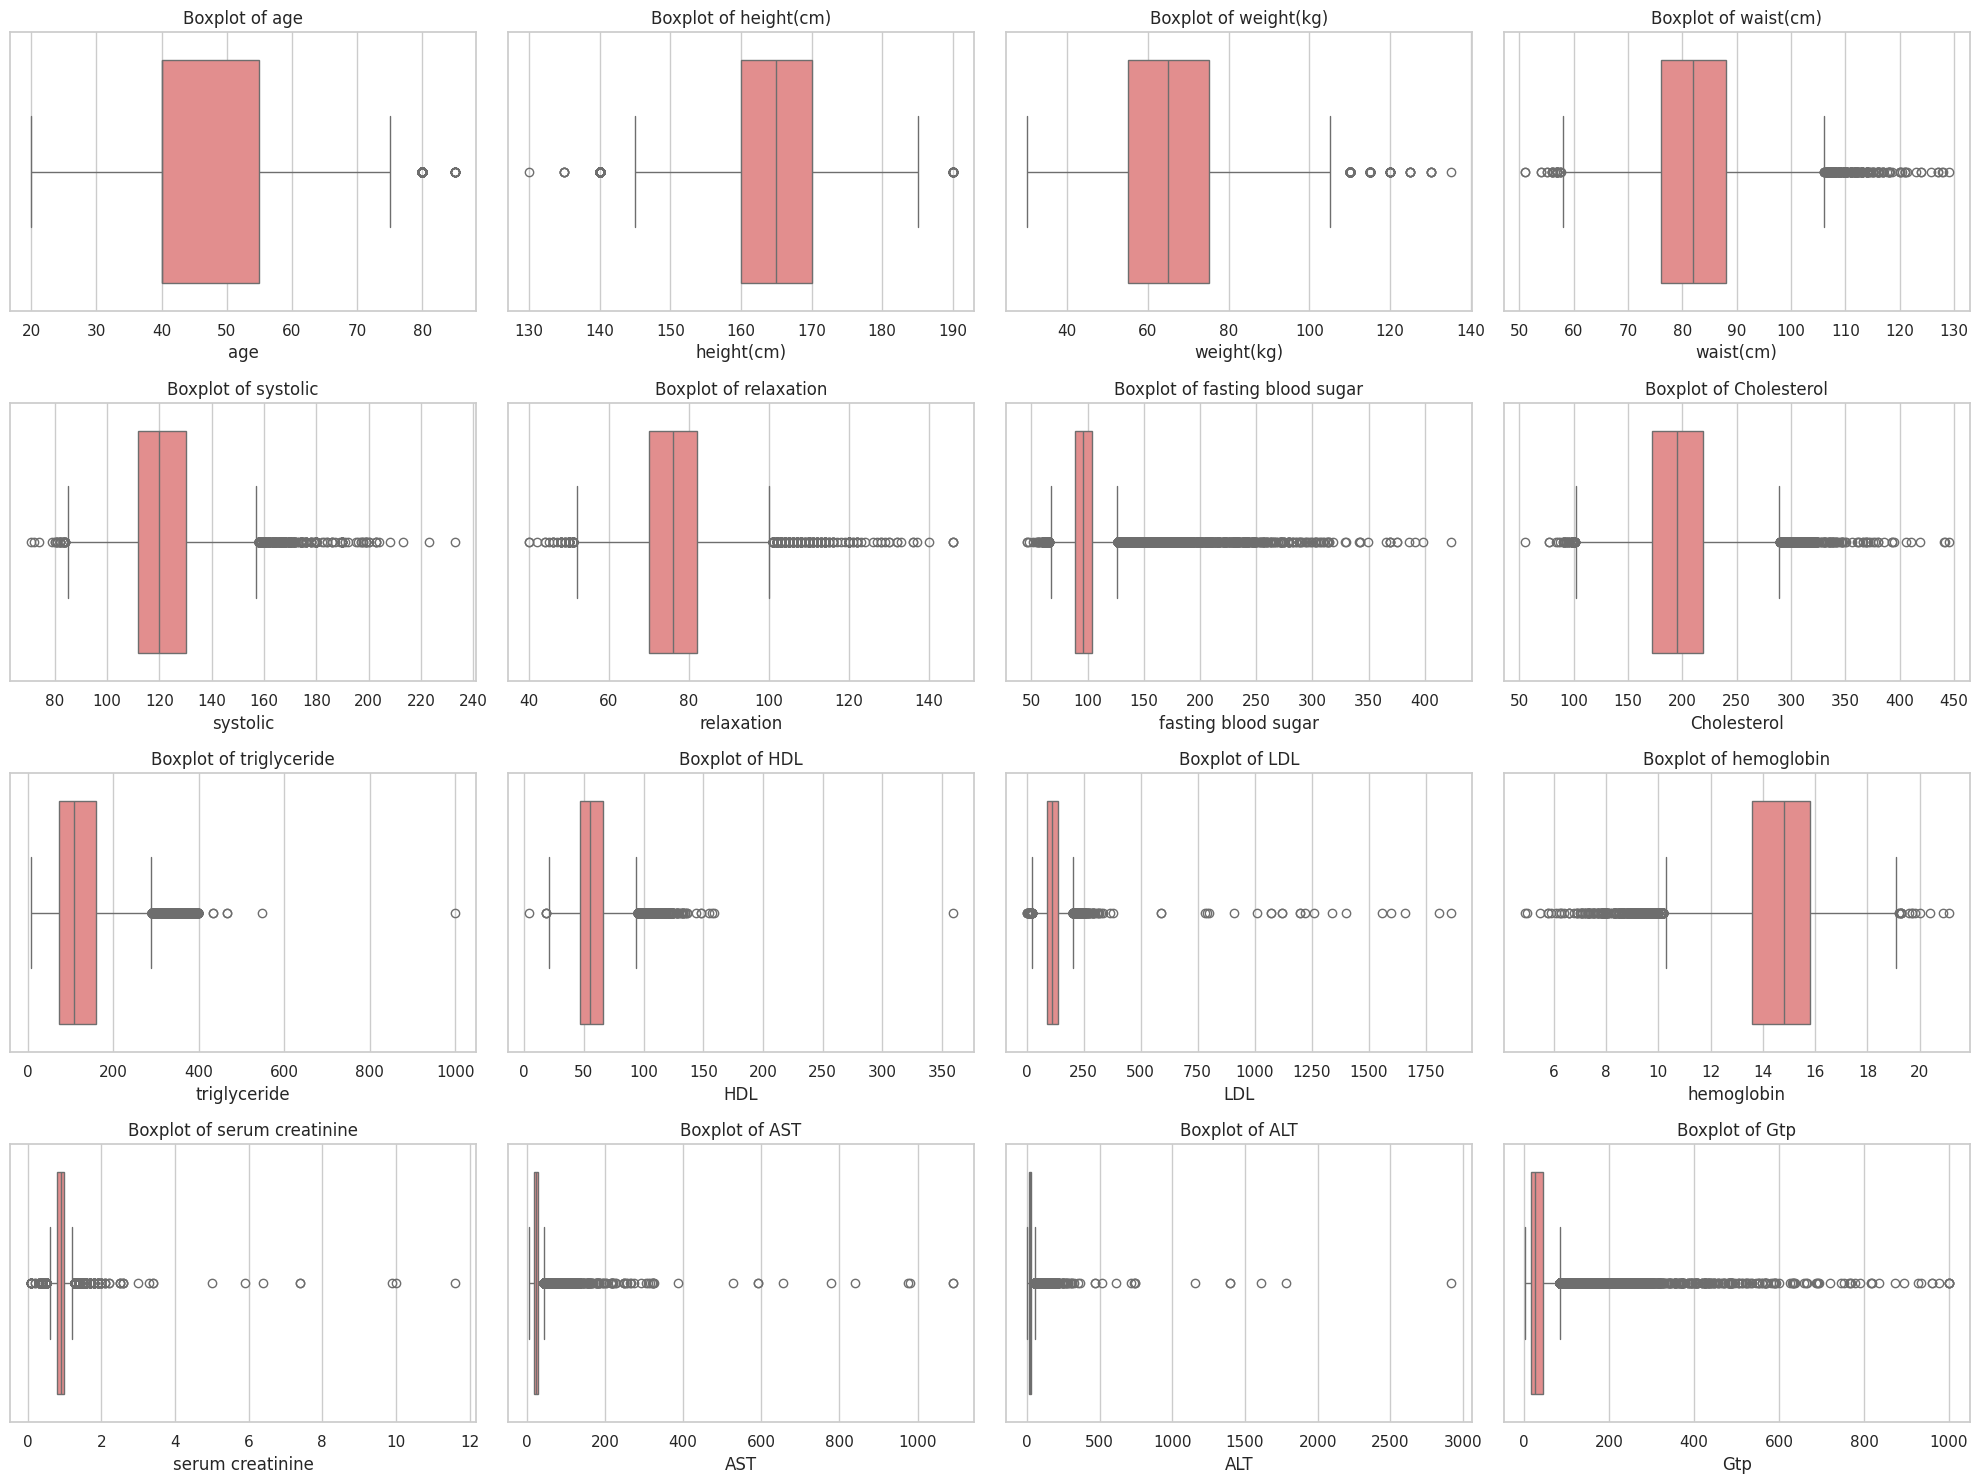

In [ ]:
# Plot Boxplots (for Outlier Detection)
print("\n--- Boxplots for Outlier Detection ---")
plt.figure(figsize=(20, 15))
for i, col in enumerate(continuous_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


--- Counts of Categorical Variables ---


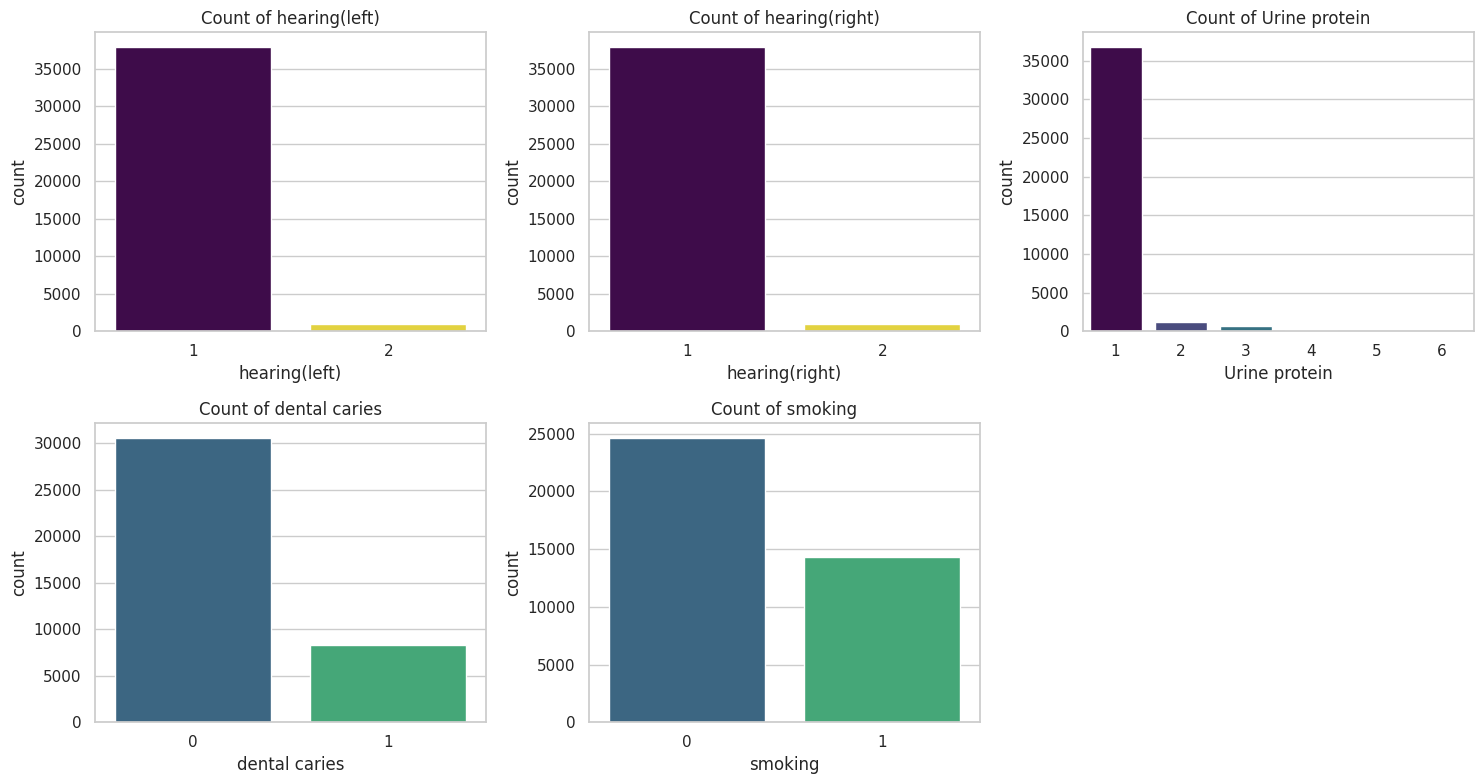

In [ ]:
# --- 3. Categorical Variable Analysis ---
categorical_cols = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries', 'smoking']

print("\n--- Counts of Categorical Variables ---")
plt.figure(figsize=(15, 8))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    # FIX: Assign x variable to hue and set legend=False
    sns.countplot(x=df[col], hue=df[col], palette='viridis', legend=False)
    plt.title(f'Count of {col}')

plt.tight_layout()
plt.show()


--- Correlation Matrix ---


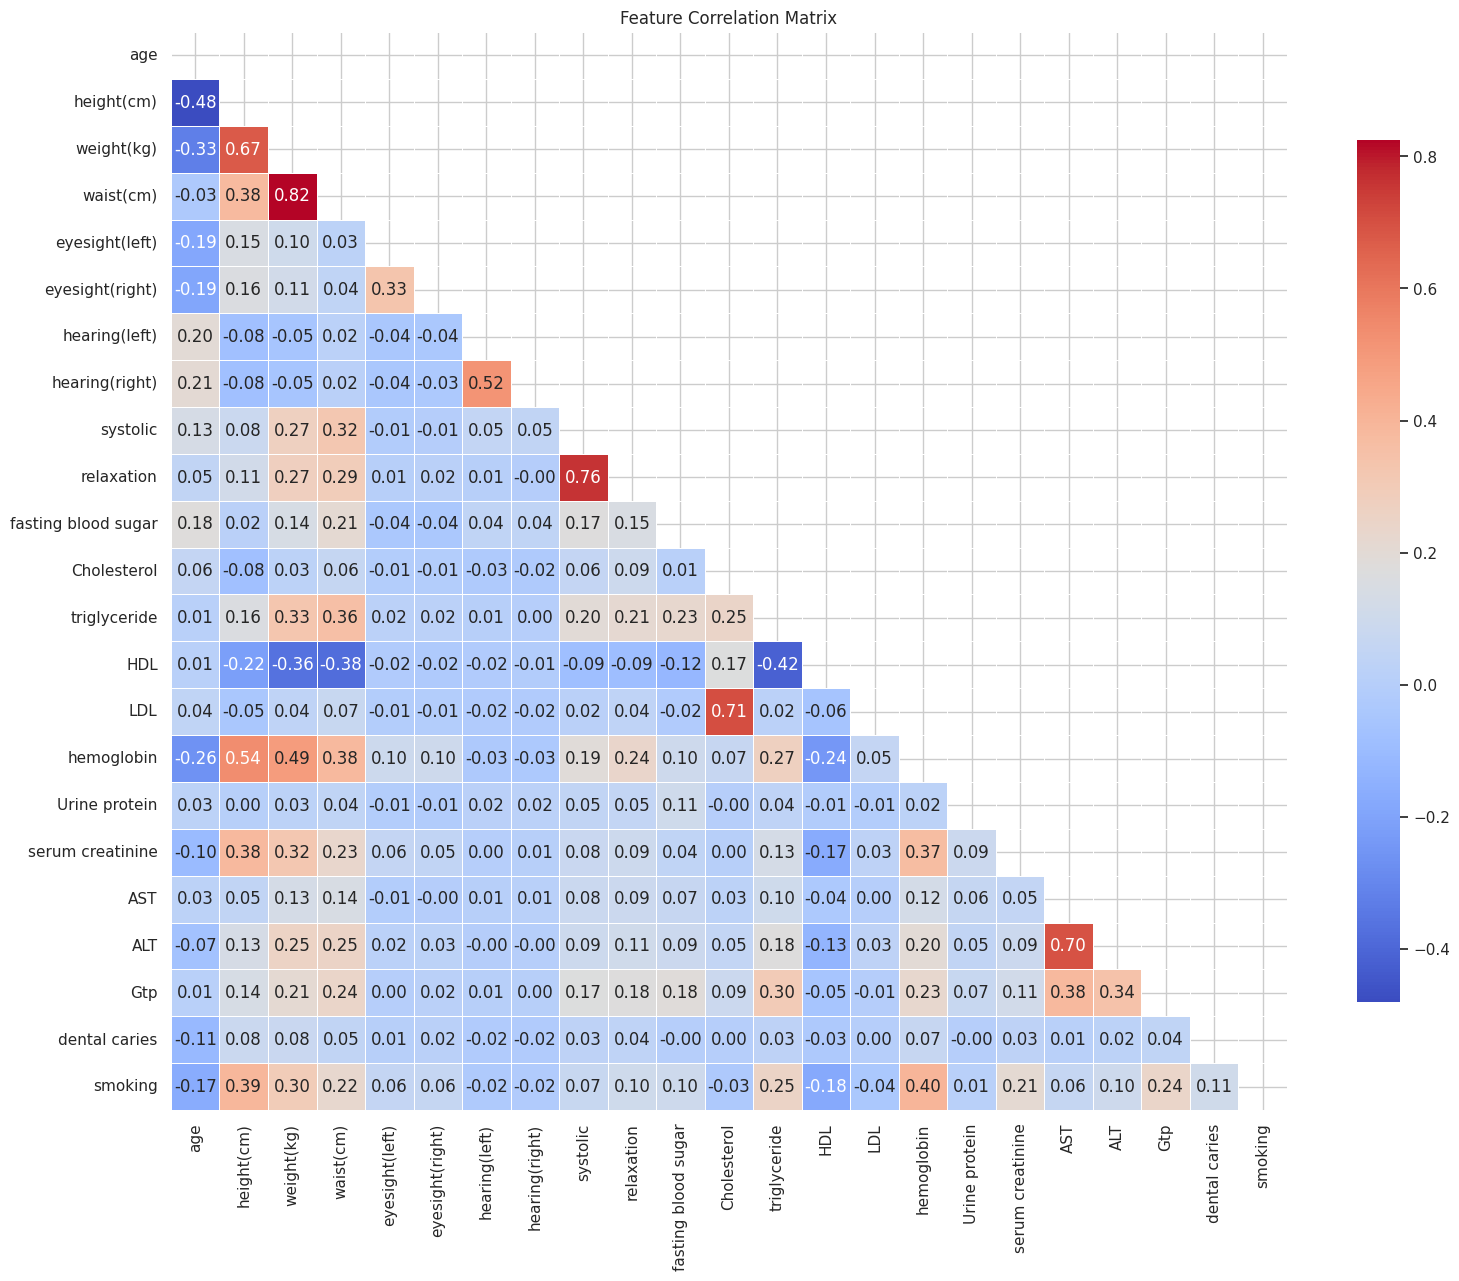

In [ ]:
# --- 4. Bivariate Analysis ---
# Correlation Matrix
print("\n--- Correlation Matrix ---")
plt.figure(figsize=(18, 14))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Mask the upper triangle
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.show()

**Capping Outliers**

In [ ]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('train_dataset.csv')

# 2. Define the continuous columns to clean
# (We skip categorical cols like 'smoking', 'dental caries', 'hearing', 'Urine protein')
cols_to_clean = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
    'eyesight(left)', 'eyesight(right)',
    'systolic', 'relaxation', 'fasting blood sugar',
    'Cholesterol', 'triglyceride', 'HDL', 'LDL',
    'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'
]

# 3. Define the Capping Function
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values to be within the bounds
    return series.clip(lower=lower_bound, upper=upper_bound)

# 4. Apply the function
df_clean = df.copy()
for col in cols_to_clean:
    df_clean[col] = cap_outliers(df_clean[col])

# 6. Save the new dataset
df_clean.to_csv('cleaned_train_dataset.csv', index=False)
print("\n Cleaned dataset saved as 'cleaned_train_dataset.csv'")


 Cleaned dataset saved as 'cleaned_train_dataset.csv'


In [ ]:
# Drop duplicates from the cleaned data
df_final = df_clean.drop_duplicates()

# Check the new shape
print(f"Final Data Shape: {df_final.shape}")

# Save it
df_final.to_csv('final_train_dataset.csv', index=False)

Final Data Shape: (33467, 23)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load your cleaned data
df = pd.read_csv('final_train_dataset.csv')

# 2. Drop High Correlation Columns to improve model stability
# 'Cholesterol' is 90% correlated with 'LDL', so we drop it.
# 'waist(cm)' is 82% correlated with 'weight(kg)', we drop it to reduce redundancy.
df_model = df.drop(columns=['Cholesterol', 'waist(cm)'])

# 3. Define Features (X) and Target (y)
# Assuming 'smoking' is your target variable
X = df_model.drop(columns=['smoking'])
y = df_model['smoking']

# 4. Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Feature Scaling (Standardization)
# This is REQUIRED for SVM and Neural Networks to work well
scaler = StandardScaler()

# Fit on training set only, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability (optional, but helpful)
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

print(f"Training Data Shape: {X_train_final.shape}")
print(f"Test Data Shape: {X_test_final.shape}")

Training Data Shape: (26773, 20)
Test Data Shape: (6694, 20)


**Logistic Regression**

Accuracy: 0.7269

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      4242
           1       0.64      0.57      0.61      2452

    accuracy                           0.73      6694
   macro avg       0.71      0.69      0.70      6694
weighted avg       0.72      0.73      0.72      6694



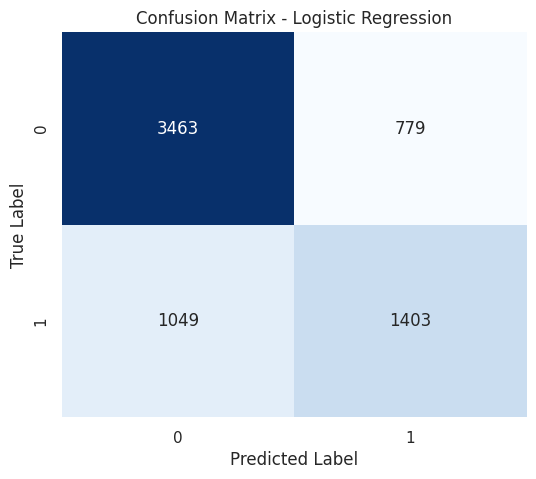

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Added confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the finalized data
df = pd.read_csv('final_train_dataset.csv')

# 2. Select Features
X = df.drop(columns=['smoking', 'Cholesterol', 'waist(cm)'])
y = df['smoking']

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Initialize and Train Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 6. Predictions & Evaluation
y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# --- 7. Confusion Matrix Visualization ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**Linear SVM**

Linear SVM Accuracy: 0.7308

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      4242
           1       0.65      0.58      0.61      2452

    accuracy                           0.73      6694
   macro avg       0.71      0.70      0.70      6694
weighted avg       0.73      0.73      0.73      6694



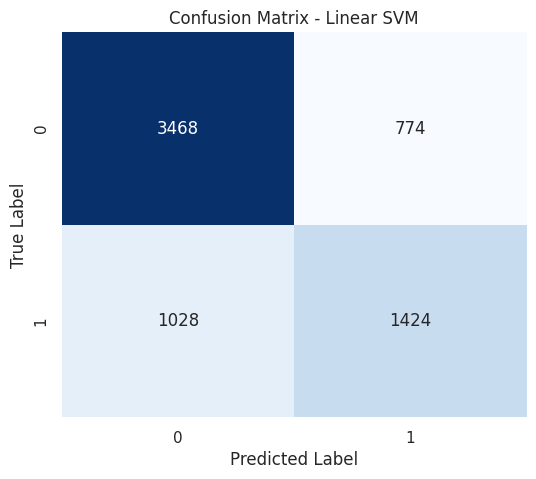

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Added confusion_matrix

# --- Assumption: Data Loading & Splitting ---
df = pd.read_csv('final_train_dataset.csv')
X = df.drop(columns=['smoking', 'Cholesterol', 'waist(cm)'])
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Linear SVM Training ---
# We increase max_iter to 2000 to ensure convergence on this dataset
svm_model = LinearSVC(random_state=42, dual=False, max_iter=2000)
svm_model.fit(X_train_scaled, y_train)

# --- Evaluation ---
y_pred = svm_model.predict(X_test_scaled)

print(f"Linear SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix Visualization ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Linear SVM')
plt.show()

**Logistic and RBF SVM with Kfold**

Starting Cross-Validation... (SVM might take a little time)

--- K-Fold Logistic Regression ---
Mean Accuracy: 0.7323
Std Deviation: 0.0055


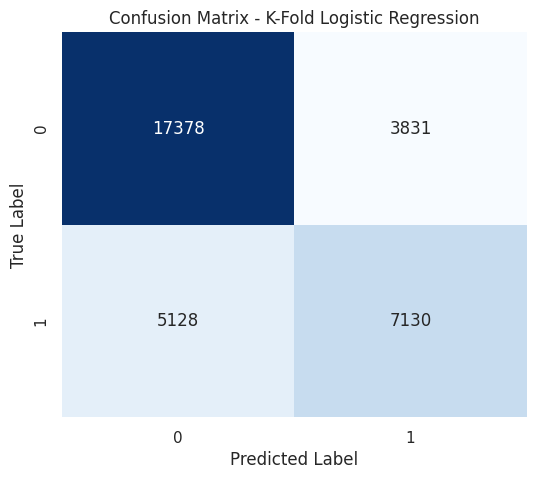



--- SVM RBF ---
Mean Accuracy: 0.7479
Std Deviation: 0.0060


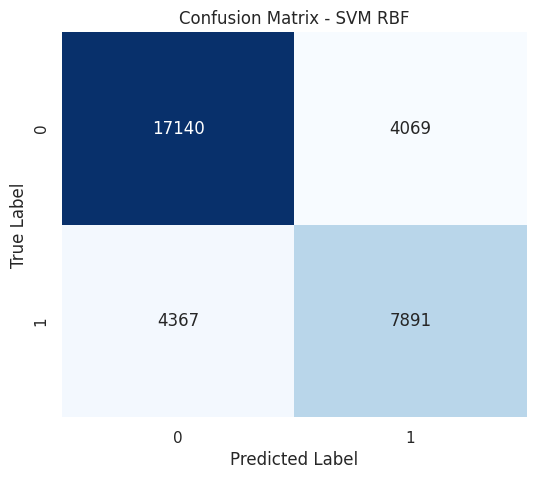

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# 1. Load Data
df = pd.read_csv('final_train_dataset.csv')

# 2. Prepare X and y
target_col = 'smoking'
# Note: If you dropped 'Cholesterol' and 'waist(cm)' in previous steps, make sure to drop them here too!
# X = df.drop(columns=['smoking', 'Cholesterol', 'waist(cm)'])
X = df.drop(target_col, axis=1)
y = df[target_col]

# 3. Define the models we want to test
models = {
    "K-Fold Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    "SVM RBF": make_pipeline(StandardScaler(), SVC(kernel='rbf'))
}

# 4. Define Cross-Validation Strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Starting Cross-Validation... (SVM might take a little time)\n")

# 5. Loop through models, evaluate, and plot matrix
for name, model in models.items():
    # A. Get Accuracy Stats (Mean & Std)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"--- {name} ---")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    print(f"Std Deviation: {scores.std():.4f}")

    # B. Get Predictions for Confusion Matrix
    # cross_val_predict gives the prediction for each point when it was in the test set
    y_pred = cross_val_predict(model, X, y, cv=cv)

    # C. Plot Confusion Matrix
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    print("\n" + "="*30 + "\n")

**Neural Network**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# 1. Load and Prepare Data
df = pd.read_csv('final_train_dataset.csv')
X = df.drop('smoking', axis=1).values
y = df['smoking'].values

# Scale the data (Crucial for Neural Networks!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Define the Neural Network Structure
def create_model(input_shape):
    model = keras.Sequential([
        # Layer 1: 128 Neurons, ReLU activation
        layers.Dense(128, activation='relu', input_shape=[input_shape]),
        layers.BatchNormalization(), # Helps training stability
        layers.Dropout(0.3),         # Turns off 30% of neurons randomly to prevent overfitting

        # Layer 2: 32 Neurons
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Output Layer: 1 Neuron (0 or 1), Sigmoid activation
        layers.Dense(1, activation='sigmoid'),
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# 3. Run Cross-Validation (Manual Loop for Keras)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

print("Training Neural Network (5 Folds)...")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled, y)):
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_model(X_train.shape[1])

    # Train
    # verbose=0 hides the huge wall of text
    # epochs=50 is a good starting point
    model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=50, verbose=0)

    # Evaluate
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    accuracies.append(acc)
    print(f"Fold {fold+1} Accuracy: {acc:.4f}")

print("\n--- Neural Network Results ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Std Deviation: {np.std(accuracies):.4f}")

Training Neural Network (5 Folds)...
Fold 1 Accuracy: 0.7599
Fold 2 Accuracy: 0.7593
Fold 3 Accuracy: 0.7568
Fold 4 Accuracy: 0.7459
Fold 5 Accuracy: 0.7485

--- Neural Network Results ---
Mean Accuracy: 0.7541
Std Deviation: 0.0058


**On Test Dataset**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# 1. Load Data
train_df = pd.read_csv('final_train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

# 2. Define Outlier Capping Function
# This sets extreme values to the calculated Min/Max (doesn't delete rows)
cols_to_clean = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
    'eyesight(left)', 'eyesight(right)',
    'systolic', 'relaxation', 'fasting blood sugar',
    'Cholesterol', 'triglyceride', 'HDL', 'LDL',
    'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp'
]

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# 3. Apply Capping to Test Data
# (We assume 'final_train_dataset.csv' is already cleaned)
for col in cols_to_clean:
    if col in test_df.columns:
        test_df[col] = cap_outliers(test_df[col])

# 4. Prepare X and y
X_train = train_df.drop('smoking', axis=1).values
y_train = train_df['smoking'].values

if 'id' in test_df.columns:
    ids = test_df['id']
    X_test = test_df.drop('id', axis=1).values
else:
    ids = test_df.index
    X_test = test_df.values

# 5. Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Define Model
def create_model(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=[input_shape]),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 7. Train
model = create_model(X_train_scaled.shape[1])
model.fit(X_train_scaled, y_train, batch_size=32, epochs=50, verbose=0)

# 8. Predict
print("Generating predictions...")
predictions_prob = model.predict(X_test_scaled, verbose=0)
predictions_class = (predictions_prob > 0.5).astype(int).flatten()

# 9. Save
submission = pd.DataFrame({
    'id': ids,
    'smoking': predictions_class
})

submission.to_csv('submission.csv', index=False)
print("Predictions saved to 'submission.csv'")

Generating predictions...
Predictions saved to 'submission.csv'


**Comparsion of Models**

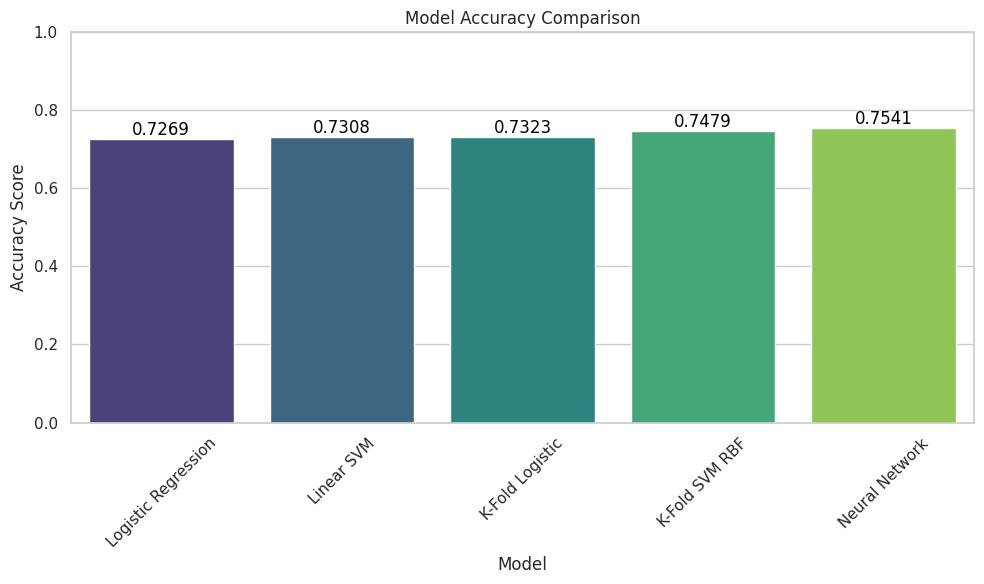

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings to avoid the "FutureWarning" message
warnings.filterwarnings("ignore")

# Your actual data
data = {
    'Model': ['Logistic Regression', 'Linear SVM', 'K-Fold Logistic', 'K-Fold SVM RBF', 'Neural Network'],
    'Accuracy': [0.7269, 0.7308, 0.7323, 0.7479, 0.7541]
}

df_accuracies = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Assign 'x' to 'hue' to fix the warning.
# We use dodge=False because x and hue are the same, so we don't need to offset bars.
ax = sns.barplot(x='Model', y='Accuracy', data=df_accuracies, palette='viridis', hue='Model', dodge=False)

# Manually remove the legend if it appears (cleaner than passing legend=False which can error in some versions)
if ax.legend_:
    ax.legend_.remove()

plt.ylim(0, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.xticks(rotation=45)

# Adding the exact accuracy labels (4 decimal places)
for index, row in df_accuracies.iterrows():
    plt.text(index, row['Accuracy'] + 0.01, f"{row['Accuracy']:.4f}", color='black', ha="center")

plt.tight_layout()
plt.show()